# Financial and Economic Data Applications
Original from Wes McKinney (https://github.com/wesm/pydata-book/tree/1st-edition)

Updated and edited for Python circa 2018 by R. D. Slater

MSDS 7333 - Quantifying the World - Case Study 8  
Signal Frontier Analysis  
Team Members: Jeffery Lancon, Manisha Pednekar, Andrew Walch, David Stroud  
Date: 03/05/2019


In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))

In [2]:
%matplotlib inline

In [3]:
import os
currentDir = %pwd
os.chdir(currentDir)

In [4]:
pwd

'C:\\Users\\Prodigy\\Documents\\GitRepositories\\MSDS_7333_QTW\\CaseStudy_8'

## Data munging topics

### Time series and cross-section alignment

In [5]:
close_px = pd.read_csv('Data/MSDS7333_Wk7_stock_px.csv', parse_dates=True, index_col=0)
volume = pd.read_csv('Data/MSDS7333_Wk7_volume.csv', parse_dates=True, index_col=0)
prices = close_px.loc['2011-09-05':'2011-09-14', ['AAPL', 'JNJ', 'SPX', 'XOM']]
volume = volume.loc['2011-09-05':'2011-09-12', ['AAPL', 'JNJ', 'XOM']]

In [6]:
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [7]:
volume

,AAPL,JNJ,XOM
2011-09-06,18173500.0,15848300.0,25416300.0
2011-09-07,12492000.0,10759700.0,23108400.0
2011-09-08,14839800.0,15551500.0,22434800.0
2011-09-09,20171900.0,17008200.0,27969100.0
2011-09-12,16697300.0,13448200.0,26205800.0


In [8]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,6.901205e+09,1.024434e+09,NaN,1.808370e+09
2011-09-07,4.796054e+09,7.040072e+08,NaN,1.701934e+09
2011-09-08,5.700561e+09,1.010070e+09,NaN,1.633702e+09
2011-09-09,7.614489e+09,1.082402e+09,NaN,1.986086e+09
2011-09-12,6.343972e+09,8.551710e+08,NaN,1.882625e+09
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [9]:
vwap = (prices * volume).sum() / volume.sum()

In [10]:
vwap

AAPL    380.655181
JNJ      64.394769
SPX            NaN
XOM      72.024288
dtype: float64

In [11]:
vwap.dropna()

AAPL    380.655181
JNJ      64.394769
XOM      72.024288
dtype: float64

In [12]:
prices.align(volume, join='inner')

(              AAPL    JNJ    XOM
 2011-09-06  379.74  64.64  71.15
 2011-09-07  383.93  65.43  73.65
 2011-09-08  384.14  64.95  72.82
 2011-09-09  377.48  63.64  71.01
 2011-09-12  379.94  63.59  71.84,
                   AAPL         JNJ         XOM
 2011-09-06  18173500.0  15848300.0  25416300.0
 2011-09-07  12492000.0  10759700.0  23108400.0
 2011-09-08  14839800.0  15551500.0  22434800.0
 2011-09-09  20171900.0  17008200.0  27969100.0
 2011-09-12  16697300.0  13448200.0  26205800.0)

In [13]:
s1 = Series(range(3), index=['a', 'b', 'c'])
s2 = Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = Series(range(3), index=['f', 'a', 'c'])
DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,two,three
a,0.0,NaN,1.0
b,1.0,1.0,NaN
c,2.0,2.0,2.0
d,NaN,0.0,NaN
e,NaN,3.0,NaN
f,NaN,NaN,0.0


In [14]:
DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,two,three
f,NaN,NaN,0.0
a,0.0,NaN,1.0
c,2.0,2.0,2.0
e,NaN,3.0,NaN


### Operations with time series of different frequencies

In [15]:
ts1 = Series(np.random.randn(3),
             index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1

2012-06-13   -0.621454
2012-06-20    0.407264
2012-06-27   -1.472403
Freq: W-WED, dtype: float64

In [16]:
ts1.resample('B')

DatetimeIndexResampler [freq=<BusinessDay>, axis=0, closed=left, label=left, convention=start, base=0]

In [17]:
ts1.resample('B').ffill()

2012-06-13   -0.621454
2012-06-14   -0.621454
2012-06-15   -0.621454
2012-06-18   -0.621454
2012-06-19   -0.621454
2012-06-20    0.407264
2012-06-21    0.407264
2012-06-22    0.407264
2012-06-25    0.407264
2012-06-26    0.407264
2012-06-27   -1.472403
Freq: B, dtype: float64

In [18]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = Series(np.random.randn(6), index=dates)
ts2

2012-06-12    0.650115
2012-06-17    0.882065
2012-06-18   -0.572277
2012-06-21   -0.208151
2012-06-22   -0.940863
2012-06-29    0.201432
dtype: float64

In [19]:
ts1.reindex(ts2.index,method='ffill')

2012-06-12         NaN
2012-06-17   -0.621454
2012-06-18   -0.621454
2012-06-21    0.407264
2012-06-22    0.407264
2012-06-29   -1.472403
dtype: float64

In [20]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.260611
2012-06-18   -1.193731
2012-06-21    0.199113
2012-06-22   -0.533599
2012-06-29   -1.270971
dtype: float64

#### Using periods instead of timestamps

In [21]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
              index=pd.period_range('1982', periods=4, freq='A-DEC'))
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [22]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

In [23]:
infl_q = infl.asfreq('Q-SEP', how='end')

In [24]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [25]:
infl_q.reindex(gdp.index, method='ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of day and "as of" data selection

In [26]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
                        ...  
2012-06-06 15:54:00    1554.0
2012-06-06 15:55:00    1555.0
2012-06-06 15:56:00    1556.0
2012-06-06 15:57:00    1557.0
2012-06-06 15:58:00    1558.0
2012-06-06 15:59:00    1559.0
Length: 1560, dtype: float64

In [27]:
from datetime import time
ts[time(10, 0)]

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [28]:
time(10, 0)

datetime.time(10, 0)

In [29]:
ts.at_time(time(10, 0))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

In [30]:
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

In [31]:
np.random.seed(12346)

In [32]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00    20.0
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00    22.0
2012-06-01 09:53:00    23.0
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00    25.0
2012-06-01 09:56:00     NaN
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00     NaN
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00     NaN
dtype: float64

In [33]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      25.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1197.0
Freq: B, dtype: float64

### Splicing together data sources

In [34]:
data1 = DataFrame(np.ones((6, 3), dtype=float),
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/12/2012', periods=6))
data2 = DataFrame(np.ones((6, 3), dtype=float) * 2,
                  columns=['a', 'b', 'c'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [35]:
data2 = DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.loc[:'2012-06-14'], data2.loc['2012-06-15':]],sort=True)
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [36]:
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [37]:
spliced.update(data2, overwrite=False)

In [38]:
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [39]:
cp_spliced = spliced.copy()
cp_spliced[['a', 'c']] = data1[['a', 'c']]
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### Return indexes and cumulative returns

In [40]:
from pandas_datareader import data as web
price = web.get_data_yahoo('AAPL', '2011-01-01')['Adj Close']
price[-5:]

Date
2019-02-26    174.330002
2019-02-27    174.869995
2019-02-28    173.149994
2019-03-01    174.970001
2019-03-04    175.559998
Name: Adj Close, dtype: float64

In [41]:
price['2011-10-03'] / price['2011-3-01'] - 1

0.07239978208562214

In [42]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1  # Set first value to 1
ret_index

Date
2011-01-03    1.000000
2011-01-04    1.005219
2011-01-05    1.013442
2011-01-06    1.012622
2011-01-07    1.019874
2011-01-10    1.039081
                ...   
2019-02-25    5.549779
2019-02-26    5.552965
2019-02-27    5.570165
2019-02-28    5.515378
2019-03-01    5.573351
2019-03-04    5.592144
Name: Adj Close, Length: 2054, dtype: float64

In [43]:
m_returns = ret_index.resample('BM').last().pct_change()
m_returns['2012']

Date
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025969
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.045822
2012-08-31    0.122802
2012-09-28    0.002796
2012-10-31   -0.107600
2012-11-30    0.015453
2012-12-31   -0.090743
Freq: BM, Name: Adj Close, dtype: float64

In [44]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1
m_rets['2012']

Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025969
2012-05   -0.010702
2012-06    0.010853
2012-07    0.045822
2012-08    0.122802
2012-09    0.002796
2012-10   -0.107600
2012-11    0.015453
2012-12   -0.090743
Freq: M, Name: Adj Close, dtype: float64

## Group transforms and analysis

In [45]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10
np.random.seed(12345)

In [46]:
import random; random.seed(0)
import string

N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

In [47]:
M = 500
df = DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
                'Value' : np.random.randn(M) / 200 + 0.08,
                'ShortInterest' : np.random.randn(M) / 200 - 0.02},
                index=tickers[:M])

In [48]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index=tickers,
                    name='industry')

In [49]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.029485,0.079929,-0.020739
TECH,0.030407,0.080113,-0.019609


In [50]:
by_industry.describe()

Momentum                                            ...     \
             count      mean       std       min       25%    ...      
industry                                                      ...      
FINANCIAL    246.0  0.029485  0.004802  0.017210  0.026263    ...      
TECH         254.0  0.030407  0.005303  0.016778  0.026456    ...      

          ShortInterest                                          
                    min       25%       50%       75%       max  
industry                                                         
FINANCIAL     -0.036997 -0.024138 -0.020833 -0.017345 -0.006322  
TECH          -0.032682 -0.022779 -0.019829 -0.016923 -0.003698  

[2 rows x 24 columns]

In [51]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()

df_stand = by_industry.apply(zscore)

In [52]:
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum              Value      ShortInterest     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  1.114736e-15  1.0  8.001278e-15  1.0  3.081772e-15  1.0
TECH      -2.779929e-16  1.0 -7.139521e-15  1.0 -1.910982e-15  1.0

In [53]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  246.0   1.0  246.0           1.0  246.0
TECH           1.0  254.0   1.0  254.0           1.0  254.0

In [54]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,Value,ShortInterest
MYNBI,-0.091346,-1.004802,-0.976696
QPMZJ,0.794005,-0.358356,1.299919
PLSGQ,-0.541047,-1.679355,-0.836164
EJEYD,-0.583207,0.990749,-1.623142
TZIRW,1.572120,0.374314,-0.265423
ZTEJD,1.395171,-1.436006,0.360703
XCVKP,-0.074863,-0.660154,0.632931
RDLNK,0.238200,0.102086,-0.319869
TUGRP,1.075068,1.580983,1.665302
OQIBZ,1.412345,-1.313972,0.358356


### Group factor exposures

In [55]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
              index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
                    index=ticker_subset)

In [56]:
factors.corrwith(port)

f1    0.402377
f2   -0.680980
f3    0.168083
dtype: float64

In [57]:
from pyfinance import ols
from pyfinance.ols import PandasRollingOLS
model=PandasRollingOLS(y=port, x=factors,window=10)
model.beta

,f1,f2,f3
FYNCS,1.523291,-1.301151,0.514681
MTSHZ,1.703277,-1.139683,0.547610
OMLRE,1.590718,-1.075082,0.266399
OCNQR,1.653191,-1.035805,0.247607
XRHDX,1.514009,-0.760738,0.277267
TASQL,1.482487,-0.570713,0.322039
PVKPP,1.412132,-0.528023,0.320582
IVPZY,1.302049,-0.499206,0.414142
VOLSW,1.177061,-0.673796,0.513970
FEZAR,0.858180,-0.870596,0.917122


In [58]:
def beta_exposure(chunk, factors=None):
    return feature1(y=chunk, x=factors).beta

In [59]:
# Not working properly - Unknown issue
#by_ind = port.groupby(industries)
#exposures = by_ind.apply(beta_exposure, factors=factors)
#exposures.unstack()

### Decile and quartile analysis

In [60]:
import pandas_datareader.data as web
data = web.get_data_yahoo('SPY', '2006-01-01')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3313 entries, 2006-01-03 to 2019-03-04
Data columns (total 6 columns):
High         3313 non-null float64
Low          3313 non-null float64
Open         3313 non-null float64
Close        3313 non-null float64
Volume       3313 non-null float64
Adj Close    3313 non-null float64
dtypes: float64(6)
memory usage: 181.2 KB


In [61]:
#px = data['Adj Close']
#returns = px.pct_change()

#def to_index(rets):
#    index = (1 + rets).cumprod()
#    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
#    index.values[first_loc] = 1
#    return index

#def trend_signal(rets, lookback, lag):
#    signal = rets.rolling(lookback, min_periods=lookback - 5).sum()
#    #signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5)
#    return signal.shift(lag)

In [62]:
#signal = trend_signal(returns, 100, 3)
#trade_friday = signal.resample('W-FRI').resample('B').ffill()
#trade_rets = trade_friday.shift(1) * returns
#trade_rets = trade_rets[:len(returns)]

In [63]:
#to_index(trade_rets).plot()

In [64]:
#vol = pd.rolling_std(returns, 250, min_periods=200) * np.sqrt(250)

#def sharpe(rets, ann=250):
#    return rets.mean() / rets.std()  * np.sqrt(ann)

In [65]:
#cats = pd.qcut(vol, 4)
#print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

In [66]:
#trade_rets.groupby(cats).agg(sharpe)

## More example applications

## Signal frontier analysis

### Balanced Portfolio
LOW - Lowes Home Improvement  
SBUX - Starbucks
FB - Facebook  
JNJ - Johnson & Johnson  
DAL - Delta Airlines  
BAC - Bank of America Corporation  
GE - General Electric

In [67]:
import datetime
import pandas as pd

start_dt=datetime.datetime(2016,1,4)
end_dt=datetime.datetime(2019,2,27)
from pandas_datareader import data as web
#stock='AAPL'
#px=pd.DataFrame({'AAPL':web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']})
#names=['GOOG','MSFT', 'GS','INTC', 'MS', 'BAC', 'C']
stock='LOW'
px=pd.DataFrame({'LOW':web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']})
names=['SBUX','FB', 'JNJ','DAL', 'BAC', 'GE']
for stock in names:
    while True:
        try:
            px[stock]=web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')


In [68]:
#px = pd.read_csv('ch11/stock_px.csv')

In [69]:
plt.close('all')

Text(0.5,1,'Cumulative Returns since Jan 2016 - Balanced Portfolio')

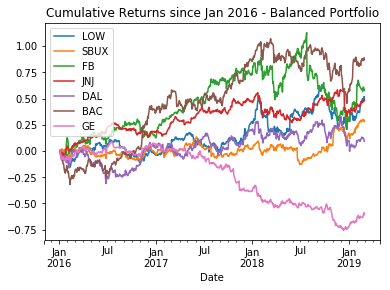

In [70]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.title('Cumulative Returns since Jan 2016 - Balanced Portfolio')

In [71]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [72]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [73]:
strat_sr(px, 70, 30)

-0.41261860266747974

In [74]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

In [75]:
import matplotlib.pyplot as plt
def heatmap(df, portfolio,cmap=plt.get_cmap('seismic')):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    ax.set_title("Heatmap - {} Portfolio (Sharpe Ratios)".format(portfolio))
    plt.colorbar(axim)

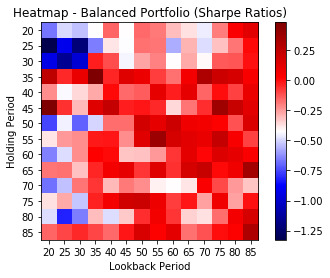

In [76]:
heatmap(ddf,'Balanced')
plt.show()

In [77]:
# max for each row
maxForRow = ddf.max(axis=0)
globalMax = maxForRow.max()
# https://stackoverflow.com/questions/23271575/printing-bold-colored-etc-text-in-ipython-qtconsole/46934204
print('\x1b[4;1;34m'+'Portfolio - Balanced'+'\x1b[0m')
print ("Max Sharpe Ratio is: %f" % globalMax)
ddf[ddf.values==globalMax]

Portfolio - Balanced
Max Sharpe Ratio is: 0.480613


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
45,0.480613,-0.061307,-0.30167,0.135244,0.232682,...,-0.175952,-0.052799,0.362224,0.221317,0.126624


In [78]:
# min for each row
minForRow = ddf.min(axis=0)
globalMin = minForRow.min()
print('\x1b[4;1;34m'+'Portfolio - Balanced'+'\x1b[0m')
print ("Min Sharpe Ratio is: %f" % globalMin)
ddf[ddf.values==globalMin]

Portfolio - Balanced
Min Sharpe Ratio is: -1.326048


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
25,-1.326048,-0.916913,-1.212588,-0.651594,-0.373619,...,-0.28885,-0.480775,-0.311486,-0.176782,0.010096


---

### Financial Services Portfolio
JPM - JP Morgan Chase  
GS - Goldman Sachs  
BAC - Bank of America  
CME - CME Group  
MS - Morgan Stanley  
USB - US Bancorp

In [79]:
stock='JPM'
pxFin=pd.DataFrame({stock:web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']})
namesFin=['GS', 'BAC','CME', 'MS', 'USB']
for stock in namesFin:
    while True:
        try:
            pxFin[stock]=web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')

Text(0.5,1,'Cumulative Returns since Jan 2016 - Financial Services Portfolio')

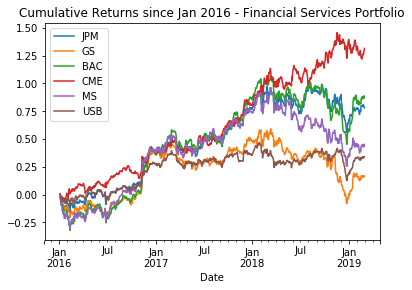

In [80]:
plt.close('all')
pxFin = pxFin.asfreq('B').fillna(method='pad')
rets = pxFin.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.title('Cumulative Returns since Jan 2016 - Financial Services Portfolio')

In [81]:
strat_sr(pxFin, 70, 30)

-0.9858895528083693

In [82]:
lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
ddFin = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        ddFin[lb][hold] = strat_sr(pxFin, lb, hold)

ddfFin = DataFrame(ddFin)
ddfFin.index.name = 'Holding Period'
ddfFin.columns.name = 'Lookback Period'

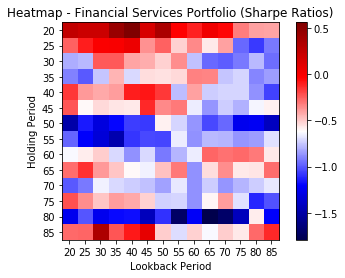

In [83]:
heatmap(ddfFin,'Financial Services')
plt.show()

In [84]:
# max for each row
maxForRow = ddfFin.max(axis=0)
globalMax = maxForRow.max()
print('\x1b[4;1;34m'+'Portfolio - Financial'+'\x1b[0m')
print ("Max Sharpe Ratio is: %f" % globalMax)
ddfFin[ddfFin.values==globalMax]

Portfolio - Financial
Max Sharpe Ratio is: 0.562195


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
20,0.258585,0.206699,0.207492,0.435937,0.562195,...,0.036753,-0.039767,-0.319948,-0.399932,-0.41154


In [85]:
# min for each row
minForRow = ddfFin.min(axis=0)
globalMin = minForRow.min()
print('\x1b[4;1;34m'+'Portfolio - Financial'+'\x1b[0m')
print ("Min Sharpe Ratio is: %f" % globalMin)
ddfFin[ddfFin.values==globalMin]

Portfolio - Financial
Min Sharpe Ratio is: -1.793080


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
80,-1.256922,-1.005073,-1.252891,-1.181078,-1.168751,...,-1.79308,-1.693519,-1.417127,-0.570134,-1.204596


---

### Technology Portfolio
INTC - Intel Corporation  
AAPL - Apple  
GOOGL - Alphabet Inc Class A - Google  
FB - Facebook  
IBM - International Business Machine  
ADBE - Adobe Inc.

In [86]:
stock='INTC'
pxTech=pd.DataFrame({stock:web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']})
namesTech=['AAPL', 'GOOGL','FB', 'IBM', 'ADBE']
for stock in namesTech:
    while True:
        try:
            pxTech[stock]=web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')

Text(0.5,1,'Cumulative Returns since Jan 2016 - Technology Portfolio')

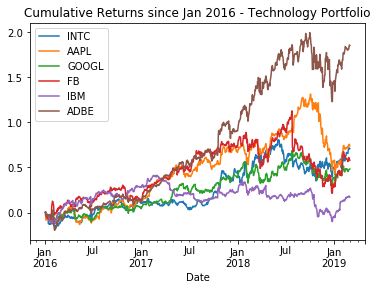

In [87]:
plt.close('all')
pxTech = pxTech.asfreq('B').fillna(method='pad')
rets = pxTech.pct_change()
((1 + rets).cumprod() - 1).plot()
plt.title('Cumulative Returns since Jan 2016 - Technology Portfolio')

In [88]:
strat_sr(pxTech, 70, 30)

-0.0745311376826402

In [89]:
lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
ddTech = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        ddTech[lb][hold] = strat_sr(pxTech, lb, hold)

ddfTech = DataFrame(ddTech)
ddfTech.index.name = 'Holding Period'
ddfTech.columns.name = 'Lookback Period'

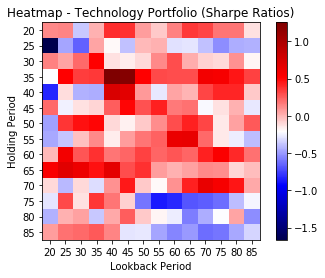

In [90]:
heatmap(ddfTech,'Technology')
plt.show()

In [91]:
# max for each row
maxForRow = ddfTech.max(axis=0)
globalMax = maxForRow.max()
print('\x1b[4;1;34m'+'Portfolio - Technology'+'\x1b[0m')
print ("Max Sharpe Ratio is: %f" % globalMax)
ddfTech[ddfTech.values==globalMax]

Portfolio - Technology
Max Sharpe Ratio is: 1.254416


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
35,-0.211546,0.515282,0.352075,0.363577,1.254416,...,0.30021,0.589753,0.565703,0.460925,0.33904


In [92]:
# min for each row
minForRow = ddfTech.min(axis=0)
globalMin = minForRow.min()
print('\x1b[4;1;34m'+'Portfolio - Technology'+'\x1b[0m')
print ("Min Sharpe Ratio is: %f" % globalMin)
ddfTech[ddfTech.values==globalMin]

Portfolio - Technology
Min Sharpe Ratio is: -1.663423


Lookback Period,20,25,30,35,40,...,65,70,75,80,85
Holding Period,,,,,,,,,,,
25,-1.663423,-0.456591,-0.653295,0.052139,-0.186554,...,-0.273734,-0.384447,-0.534143,-0.439635,-0.426686


### Future contract rolling

In [93]:
pd.options.display.max_rows = 10

In [94]:
#import pandas.io.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

Date
2010-01-04     945.454941
2010-01-05     947.957840
2010-01-06     948.625259
2010-01-07     952.629547
2010-01-08     955.799713
                 ...     
2019-02-26    2793.200073
2019-02-27    2792.000122
2019-02-28    2786.799927
2019-03-01    2804.200134
2019-03-04    2785.798950
Name: Adj Close, Length: 2306, dtype: float64

In [95]:
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
          'ESZ2': datetime(2012, 12, 21)}
expiry = Series(expiry).sort_values()

In [96]:
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [97]:
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [98]:
prices.tail()

,ESU2,ESZ2
2019-08-06,2815.04895,2816.79895
2019-08-07,2801.29895,2803.54895
2019-08-08,2809.29895,2811.04895
2019-08-09,2825.79895,2825.04895
2019-08-12,2805.79895,2803.54895


In [99]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            #weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            #weights.ix[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, item] = 1 - decay_weights
            #weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            #weights.ix[prev_date:, item] = 1
            weights.loc[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [100]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.loc['2012-09-12':'2012-09-21']

,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


In [101]:
rolled_returns = (prices.pct_change() * weights).sum(1)

### Rolling correlation and linear regression

In [102]:
#aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
#msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']
jnj = web.get_data_yahoo('JNJ', '2000-01-01')['Adj Close']
ge = web.get_data_yahoo('GE', '2000-01-01')['Adj Close']

#aapl_rets = aapl.pct_change()
#msft_rets = msft.pct_change()
jnj_rets = jnj.pct_change()
ge_rets = ge.pct_change()

In [103]:
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

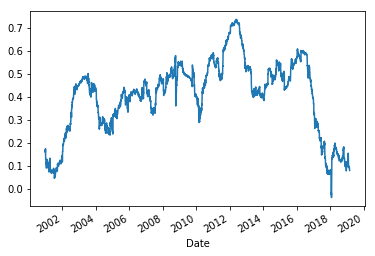

In [104]:
#aapl_rets.rolling(window=250).corr(msft_rets).plot()
ge_rets.rolling(window=250).corr(jnj_rets).plot()

In [105]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [106]:
from pyfinance.ols import PandasRollingOLS
#model = PandasRollingOLS(y=aapl_rets, x= msft_rets, window=250)
model = PandasRollingOLS(y=jnj_rets, x= ge_rets, window=250)
model.beta

,feature1
Date,
2000-12-27,NaN
2000-12-28,0.152511
2000-12-29,0.142969
2001-01-02,0.153754
2001-01-03,0.122842
...,...
2019-02-26,0.045063
2019-02-27,0.042853
2019-02-28,0.040472


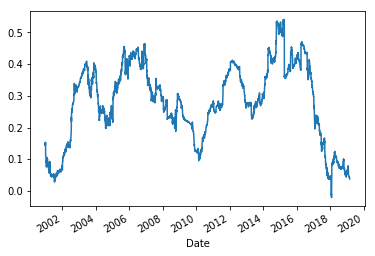

In [107]:
model.beta['feature1'].plot()

In [108]:
msft_rets

NameError: name 'msft_rets' is not defined